<a href="https://colab.research.google.com/github/MikeDeecode/KC-properties-price-analysis/blob/master/kc_properties_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**KINGS COUNTY, WASHINGTON STATE, USA HOUSE SALES DATA**

**The aim of this project:**

* To detemine the features that affects the price of the house 
* How well the features affect the price of the house 
* Develop a regression model to predict the prices of new houses 
* To obtain valuable insights and improve the pricing of properties 

##**Exploratory Analysis**

Import the required libraries 

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

print("Setup complete")

Setup complete


In [31]:
kc_properties = pd.read_csv("/content/kc_house_data.csv")
print("Success")

Success


In [32]:
kc_properties.shape

(21613, 21)

* There are 21,613 rows (houses) and 21 columns (features) in this data 

In [33]:
kc_properties.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**DESCRIPTION OF THE DATA**

**Below is a brief description of the columns in the data**

* **id** - the identification number of the house
* **date** - the date the house was sold 
* **price** - the predicted price of the house 
* **bedrooms** - th e number of bedrooms in the house
* **bathrooms** - the numbe rof bathrooms in the house 
* **sqft_living** - square footage of the house 
* **sqft_lot**- square footage of the parking lot 
* **floors** - total numbe rof floors in the house 
* **waterfront**- If the house has a waterfront view (1 for yes)
* **view** - how many times the house has been viewed 
* **condition** - How good the condition of the house is (5 is excellent)
* **grade** - overall grade given to the house based on Kings County standards (13 is excellent)
* **sqft_above** - square footage of the house apart from basement 
* **sqft_basement** - square footage of the basement 
* **yr_built** - the year the house was built 
* **yr_renovated** - Year the house was renovated 
* **zipcode** - ZIP of the house 
* **lat** - latitude of the house 
* **long** - lobgitude of the house 
* **sqft_living15** - living room area in 2015 (if there has been renovations)
* **sqft_lot15** - parking lot area in 2015 (if there has been renovations)

In [34]:
kc_properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

The data is clean for analysis 

There are no missing values 

Lets proceed to see how each of the features affects the price 

###BEDROOMS

**HOUSES BY NUMBER OF ROOMS**

In [35]:
bedrooms_grp = kc_properties.groupby('bedrooms', as_index = False)['id'].count()
bedrooms_grp.rename(columns = {'id': 'No of houses', 'bedrooms':'No of bedrooms'}, inplace = True)
bedroom_grp = bedrooms_grp.sort_values('No of houses', ascending = False)
bedroom_grp

,No of bedrooms,No of houses
3,3,9824
4,4,6882
2,2,2760
5,5,1601
6,6,272
1,1,199
7,7,38
0,0,13
8,8,13
9,9,6


* Most of the houses in Kings county has 3 bedrooms 

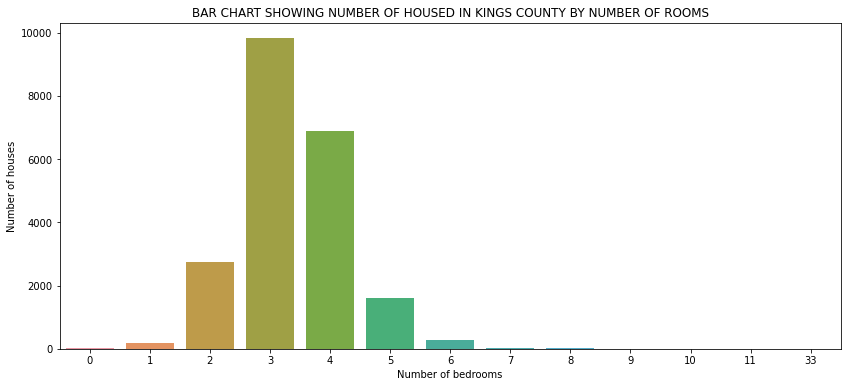

In [36]:
plt.figure(figsize = (14, 6))
plt.title("BAR CHART SHOWING NUMBER OF HOUSED IN KINGS COUNTY BY NUMBER OF ROOMS")
sns.countplot('bedrooms', data = kc_properties)
plt.xlabel("Number of bedrooms")
plt.ylabel("Number of houses")
plt.show()

* The bar chart shows that most houses have 3 bedroo followed by 4 bedrooms 

**HOW NUMBER OF BEDROOMS AFFECT THE PRICING OF THE HOUSES**

In [37]:
room_grp = kc_properties.groupby('bedrooms', as_index = False)['price'].mean()
room_grp.rename(columns = {'price': 'Average price', 'bedrooms': 'No of bedrooms' }, inplace = True)
room_grp = room_grp.sort_values('Average price', ascending = False)
room_grp

,No of bedrooms,Average price
8,8,1.105077e+06
7,7,9.511847e+05
9,9,8.939998e+05
6,6,8.255206e+05
10,10,8.193333e+05
5,5,7.865998e+05
12,33,6.400000e+05
4,4,6.354195e+05
11,11,5.200000e+05
3,3,4.662321e+05


* Houses with 8 bedrooms have the highest average price in Kings county

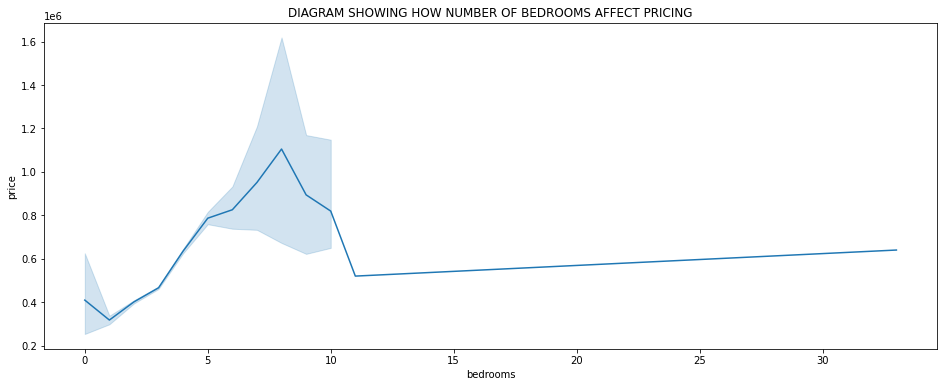

In [38]:
plt.figure(figsize = (16, 6))
sns.lineplot(x = 'bedrooms', y = 'price', data = kc_properties)
plt.title("DIAGRAM SHOWING HOW NUMBER OF BEDROOMS AFFECT PRICING")
plt.show()

* Houses between 5 and 10 bedrooms have the highest prices 
* Generally the more the rooms the higher the price of the house 

**OBSERVATION**

* It is evident that the number of bedrooms affects the pricing of the houses 

###BATHROOMS

**NUMBER OF BATHROOMS BY HOUSES**

In [39]:
bathrooms_grp = kc_properties.groupby('bathrooms', as_index = False)['id'].count()
bathrooms_grp.rename(columns = {'id': 'No of houses'}, inplace = True)
bathrooms_grp = bathrooms_grp.sort_values('No of houses', ascending = False)
bathrooms_grp

,bathrooms,No of houses
9,2.50,5380
3,1.00,3852
6,1.75,3048
8,2.25,2047
7,2.00,1930
5,1.50,1446
10,2.75,1185
11,3.00,753
13,3.50,731
12,3.25,589


* There are 5380 houses with rtwo and a half bathrooms which is the highest 

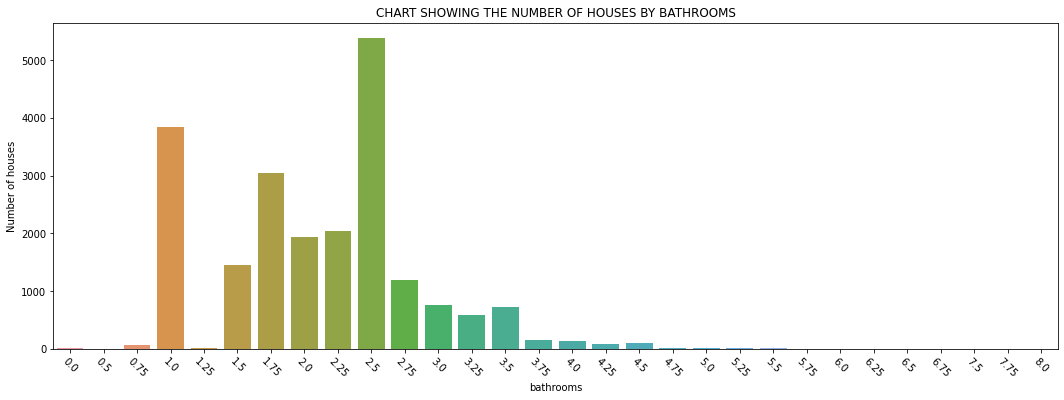

In [40]:
plt.figure(figsize = (18, 6))
sns.countplot('bathrooms', data = kc_properties)
plt.ylabel("Number of houses")
plt.title("CHART SHOWING THE NUMBER OF HOUSES BY BATHROOMS")
plt.xticks(rotation = -45)
plt.show()


* Most houses in Kings county has two and a half bathrooms 

**BATHROOMS AND HOUSE PRICING**

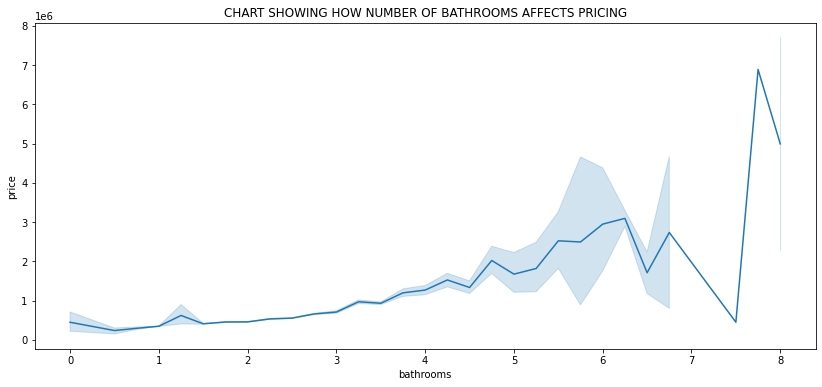

In [41]:
plt.figure(figsize = (14, 6))
sns.lineplot('bathrooms', 'price', data = kc_properties)
plt.title("CHART SHOWING HOW NUMBER OF BATHROOMS AFFECTS PRICING")
plt.show()

* Generally the more the bathrooms, the higher the price of the house 
* Houses which have between 7 and 8 bathrooms have the highest prices 

**OBSERVATION**

* The number of bathrooms affects the pricing of the houses

###SQUARE FOOTAGE OF LIVING ROOM

**HOW SQUARE FOOTAGE OF LIVING ROOM AFFECTS PRICING**

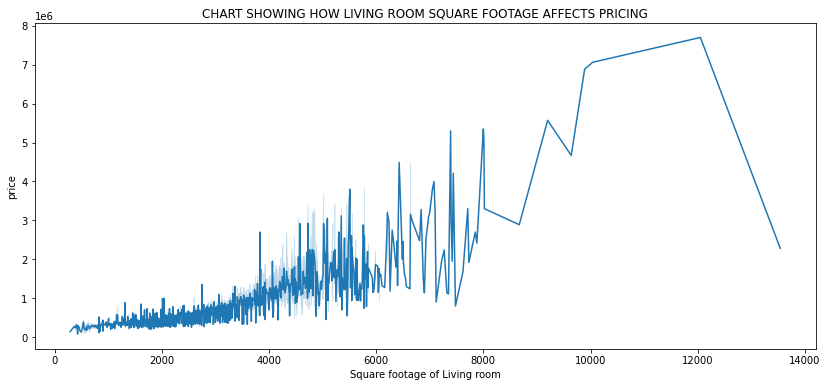

In [42]:
plt.figure(figsize = (14, 6))
sns.lineplot('sqft_living', 'price', data = kc_properties)
plt.title("CHART SHOWING HOW LIVING ROOM SQUARE FOOTAGE AFFECTS PRICING")
plt.xlabel("Square footage of Living room")
plt.show()

Looking at the trend 

*The greater the sqauare footage of the living room, the higher the price of the house 

**OBSERVATION**

* The square footage of the living room affects the pricing of the houses 

###SQUARE FOOTAGE OF PARKING LOT

**SQUARE FOOTAGE OF PARKING LOT AND PRICING**

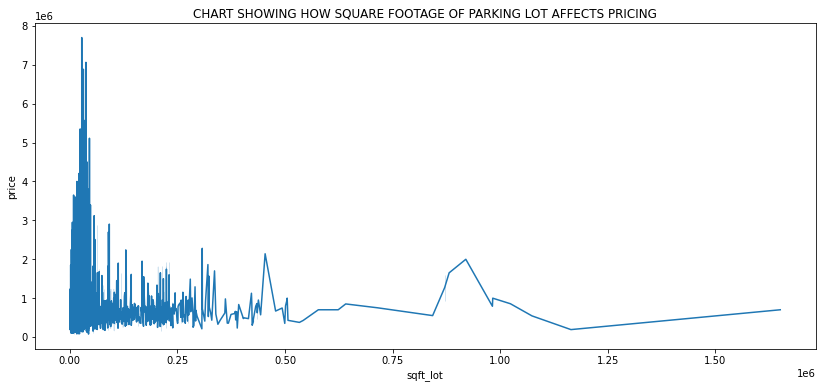

In [43]:
plt.figure(figsize = (14, 6))
sns.lineplot('sqft_lot', 'price', data = kc_properties)
plt.title("CHART SHOWING HOW SQUARE FOOTAGE OF PARKING LOT AFFECTS PRICING")
plt.show()

**OBSERVATION**

* Square footage of parking lot doesn't affect the pricing of the house 

###FLOORS

In [44]:
floors_grp = kc_properties.groupby('floors', as_index = False)['id'].count()
floors_grp.rename(columns = {'id': 'Number of houses'}, inplace = True)
floors_grp = floors_grp.sort_values('Number of houses', ascending = False)
floors_grp

,floors,Number of houses
0,1.0,10680
2,2.0,8241
1,1.5,1910
4,3.0,613
3,2.5,161
5,3.5,8


* Most houses in Kings county have 1 floor 

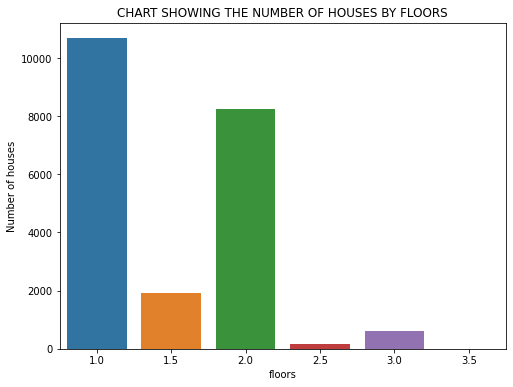

In [45]:
plt.figure(figsize = (8, 6))
sns.countplot('floors', data = kc_properties)
plt.title("CHART SHOWING THE NUMBER OF HOUSES BY FLOORS")
plt.ylabel("Number of houses")
plt.show()

**NUMBER OF FLOORS AND PRICING**

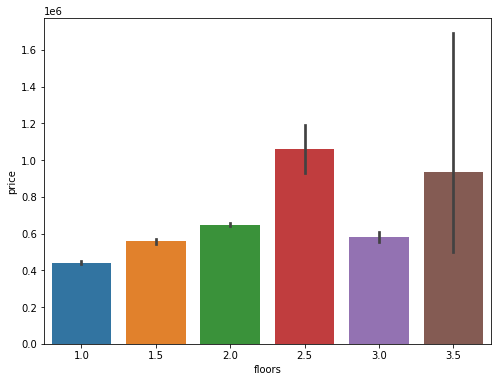

In [46]:
plt.figure(figsize = (8, 6))
sns.barplot('floors', 'price', data = kc_properties)

* Generally, houses with two and a half floors are more expensive

**OBSERVATION**

* The number of floors afects the pricing of the houses

###WATERFRONT

* **0** - No waterfront
* **1** - Has waterfront

**NUMBER OF HOUSES BY WATERFRONT**

In [47]:
kc_properties['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

* There are 21,450 houses with waterfront 
* There are 163 houses without waterfront

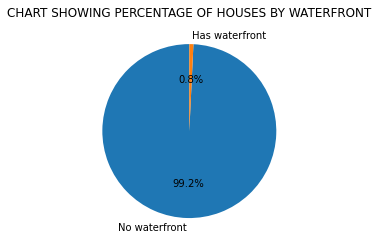

In [48]:
size = [21450, 163]
labels = 'No waterfront', 'Has waterfront'

fig, ax = plt.subplots()
ax.pie(size, labels = labels, autopct = '%1.1f%%', startangle = 90)
plt.title("CHART SHOWING PERCENTAGE OF HOUSES BY WATERFRONT")
plt.show()

* 99.2 ercent of the houses do not have waterfront 

**WATERFRONT AND HOUSE PRICING**

In [49]:
waterfront_df= kc_properties[['waterfront', 'price']]
waterfront_df['waterfront'].replace(to_replace = 0, value = 'No waterfront', inplace = True)
waterfront_df['waterfront'].replace(to_replace = 1, value = 'Has waterfront', inplace = True)

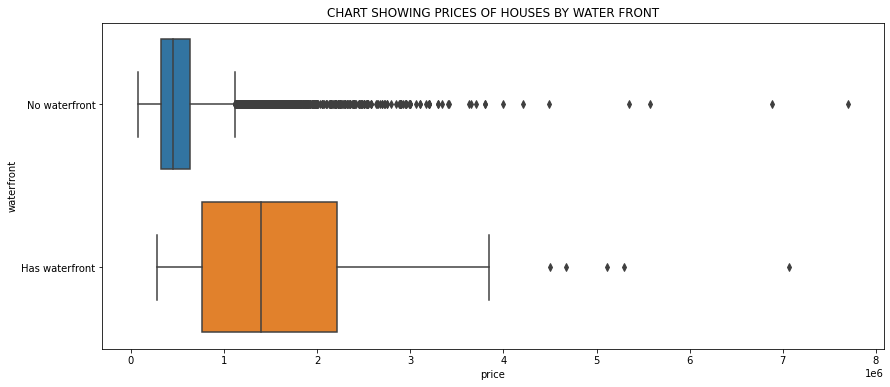

In [50]:
plt.figure(figsize = (14, 6))
sns.boxplot('price', 'waterfront', data = waterfront_df)
plt.title("CHART SHOWING PRICES OF HOUSES BY WATER FRONT")
plt.show()

* Generally, houses with waterfront are way more expensive than houses without waterfront
* However the most expensive house has no water front 

**OBSERVATION**

* Waterfront affects the pricing of the houses 

###VIEW

The number of times the house has been viewed

**NUMBER OF HOUSES BY VIEWS**

In [57]:
views_grp = kc_properties.groupby('view', as_index = False)['id'].count()
views_grp.rename(columns = {'view':'Views', 'id':'Number of houses'}, inplace = True)
views_grp = views_grp.sort_values('Number of houses', ascending = False)
views_grp

,Views,Number of houses
0,0,19489
2,2,963
3,3,510
1,1,332
4,4,319


* Most houses have not been viewed at all

In [ ]:
plt.figure(figsize = (10, 5))
sns.countplot('view', data = kc_properties)
plt.ylabel("Number of houses")
plt.title("CHART SHOWING NUMBER OF HOUSES BY VIEWS")
plt.show()

**VIEWS AND PRICING**

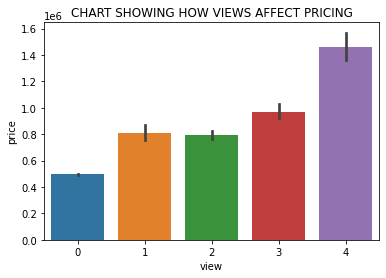

In [64]:
sns.barplot('view', 'price', data = kc_properties)
plt.title('CHART SHOWING HOW VIEWS AFFECT PRICING')
plt.show()

* Generally, the more the house is viewed, the more expensive it ebecomes

**OBSERVATION**

* The views of the houses affect the pricing 

###CONDITION

**NUMBER OF HOUSES BY CONDITION**

In [59]:
kc_properties['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

* Most of the houses in Kings county are average 

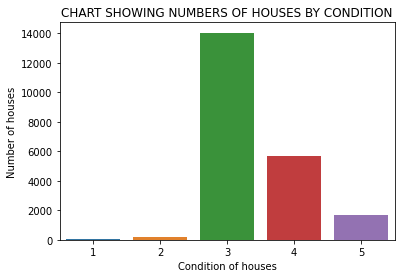

In [63]:
sns.countplot('condition', data = kc_properties)
plt.xlabel("Condition of houses")
plt.ylabel("Number of houses")
plt.title("CHART SHOWING NUMBERS OF HOUSES BY CONDITION")
plt.show()

**CONDITION OF HOUSES AND PRICING**